In [1]:
import os

import pandas as pd
import numpy as np

from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../../hetnet-ml/src')
import graph_tools as gt

DATA_DIR = '../../data/'

base_dir = os.path.join(DATA_DIR, 'time_networks-6_metanode')

In [2]:
meta = pd.DataFrame()

params = 'alpha_0.1/10x_pos-neg/0_year_diff/recall-scoring/2_pmids/dwpc_w_0.6'

for year in tqdm(range(1950, 2025, 5)):
    nodes = pd.read_csv(os.path.join(base_dir, str(year), params, 'nodes_neo4j.csv'))
    edges = pd.read_csv(os.path.join(base_dir, str(year), params, 'edges_neo4j.csv'))
    ind = pd.read_csv(os.path.join(base_dir, str(year), params, 'gold_standard.csv'))

    meta.loc[year, 'n_nodes'] = len(nodes)
    meta.loc[year, 'n_edges'] = len(edges)
    meta.loc[year, 'n_inds'] = len(ind)
    meta.loc[year, 'train_ind'] = len(ind.query('approval_year <= @year'))
    meta.loc[year, 'test_ind'] = meta.loc[year, 'n_inds'] - meta.loc[year, 'train_ind']
    meta.loc[year, 'n_ind_comp'] = ind['start_id'].nunique()
    meta.loc[year, 'n_ind_dis'] = ind['end_id'].nunique()


    n_types = nodes[':LABEL'].value_counts()
    for kind in n_types.index:
        meta.loc[year, kind] = n_types[kind]
    e_types = edges[':TYPE'].value_counts()
    for kind in e_types.index:
        meta.loc[year, kind] = e_types[kind]
        
meta.columns = [c.replace(' ', '_').replace('&', 'n').replace('>', '') for c in meta.columns]

100%|██████████| 15/15 [00:40<00:00,  4.97s/it]


In [3]:
meta.head(2)

,n_nodes,n_edges,n_inds,train_ind,test_ind,n_ind_comp,n_ind_dis,Disorders,Anatomy,Chemicals_n_Drugs,...,DISRUPTS_CDdsPS,ASSOCIATED_WITH_GawDO,ASSOCIATED_WITH_PSawCD,AFFECTS_GafPS,AUGMENTS_GagDO,AFFECTS_GafA,INHIBITS_GinCD,STIMULATES_CDstG,AFFECTS_PHafG,INTERACTS_WITH_GiwG
1950,6350.0,22593.0,694.0,289.0,405.0,166.0,257.0,2621.0,1846.0,1440.0,...,54.0,48.0,24.0,16.0,11.0,8.0,8.0,6.0,3.0,1.0
1955,8990.0,41571.0,1104.0,654.0,450.0,241.0,344.0,3721.0,2447.0,2184.0,...,104.0,149.0,40.0,26.0,19.0,21.0,12.0,16.0,4.0,2.0


In [4]:
# Get log of some values
types1 = ['n_nodes', 'n_edges', 'n_inds']
types2 = ['log_'+t for t in types1]

meta[types2] = np.log(meta[types1])

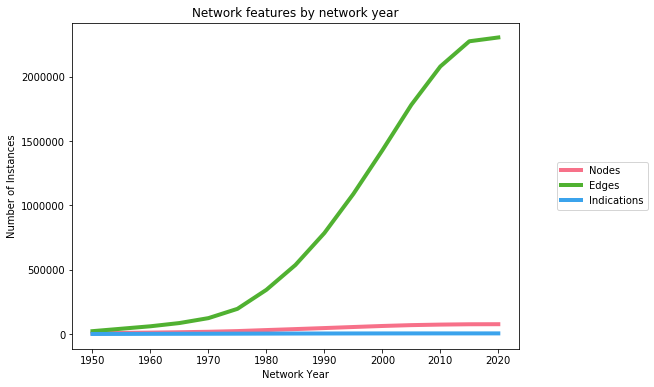

In [5]:
with sns.color_palette('husl', n_colors=len(types1)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[types1].plot(ax=ax, lw=4)
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    new_texts = {'n_nodes': 'Nodes', 'n_edges': 'Edges', 'n_inds': 'Indications'}

    L = plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5));
    for t in L.get_texts():
        t.set_text(new_texts[t.get_text()])
    
    plt.title('Network features by network year')

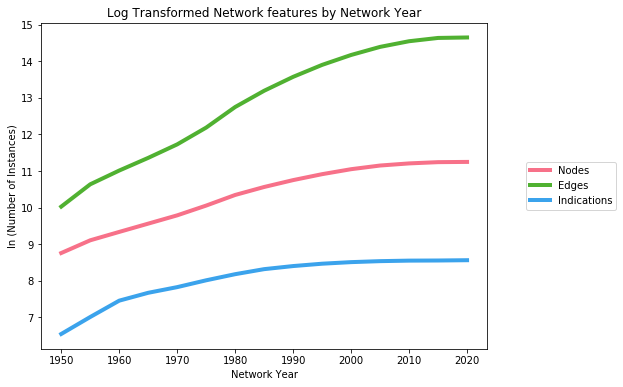

In [6]:
with sns.color_palette('husl', n_colors=len(types2)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[types2].plot(ax=ax, lw=4)
    plt.xlabel('Network Year')
    plt.ylabel('ln (Number of Instances)')
    
    new_texts = {'log_n_nodes': 'Nodes', 'log_n_edges': 'Edges', 'log_n_inds': 'Indications'}

    L = plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5))
    for t in L.get_texts():
        t.set_text(new_texts[t.get_text()])
        
    plt.title('Log Transformed Network features by Network Year')

In [7]:
meta['n_nodes']

1950     6350.0
1955     8990.0
1960    11309.0
1965    14184.0
1970    17791.0
1975    23246.0
1980    31071.0
1985    38642.0
1990    46647.0
1995    54871.0
2000    62859.0
2005    69489.0
2010    73634.0
2015    76203.0
2020    76699.0
Name: n_nodes, dtype: float64

In [8]:
types3 = ['train_ind', 'test_ind']

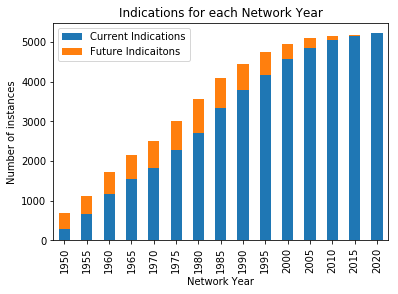

In [9]:
meta[types3].plot(kind='bar', stacked=True)
plt.xlabel('Network Year')
plt.ylabel('Number of instances')

new_texts = {'train_ind': 'Current Indications', 'test_ind': 'Future Indicaitons'}

L = plt.legend()
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])

plt.title('Indications for each Network Year');

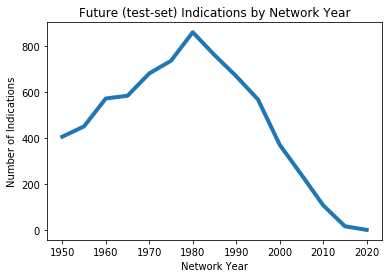

In [10]:
meta['test_ind'].plot(lw=4)
plt.title('Future (test-set) Indications by Network Year')
plt.xlabel('Network Year')
plt.ylabel('Number of Indications');

In [11]:
types4 = ['n_ind_comp', 'n_ind_dis']

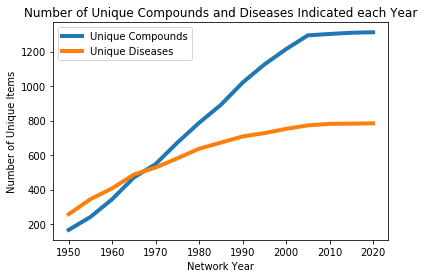

In [12]:
meta[types4].plot(lw=4)
plt.xlabel('Network Year')
plt.ylabel('Number of Unique Items')

new_texts = {'n_ind_comp': 'Unique Compounds', 'n_ind_dis': 'Unique Diseases'}

L = plt.legend()
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])

plt.title('Number of Unique Compounds and Diseases Indicated each Year');

In [13]:
n_names = [n.replace(' ', '_').replace('&', 'n').replace('>', '') for n in n_types.index]

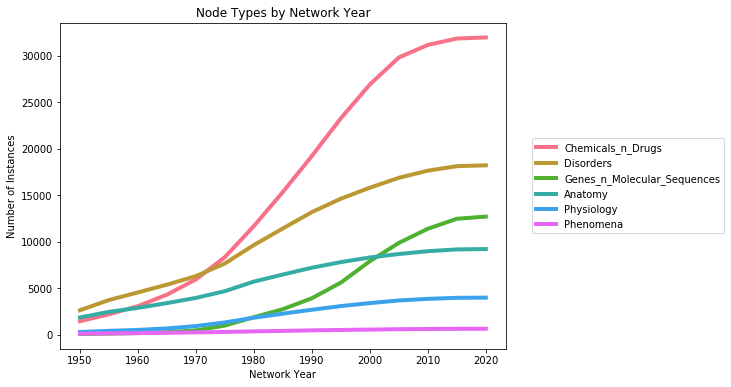

In [14]:
with sns.color_palette('husl', n_colors=len(n_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[n_names].plot(ax=ax, lw=4)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Node Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.5, 0.5));

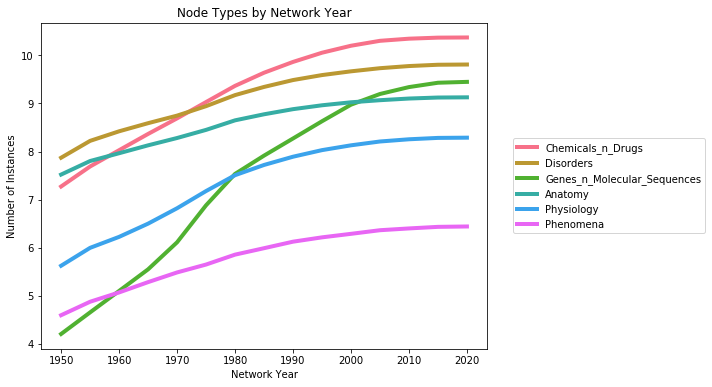

In [15]:
with sns.color_palette('husl', n_colors=len(n_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    np.log(meta[n_names]).plot(ax=ax, lw=4)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Node Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.5, 0.5));

In [16]:
e_names = [e.replace(' ', '_').replace('&', 'n').replace('>', '') for e in e_types.index]

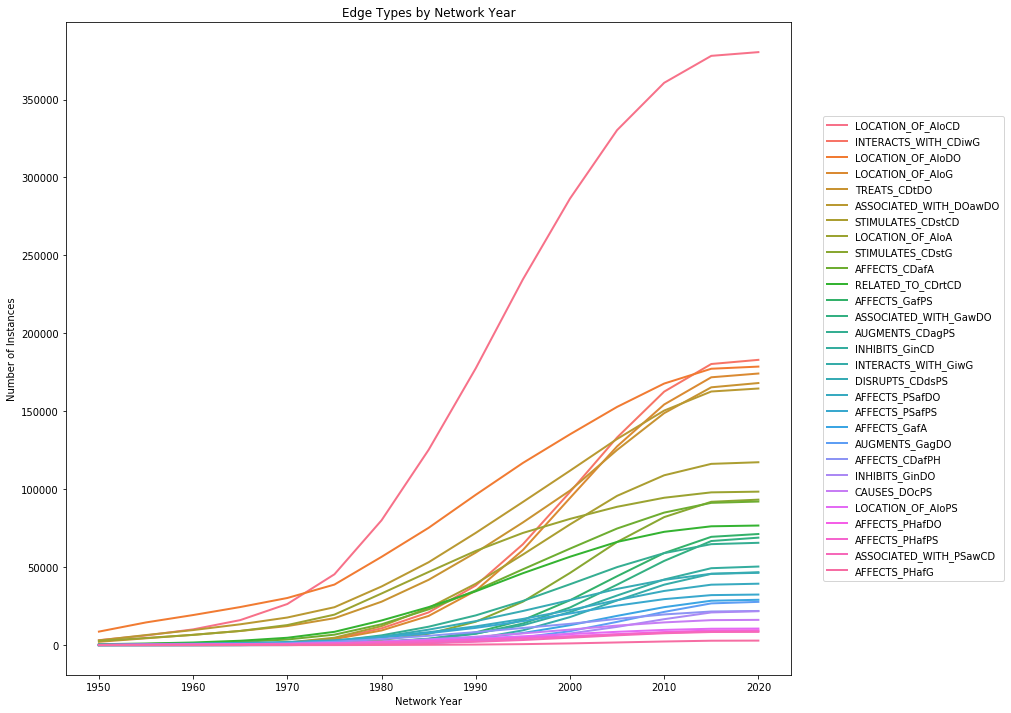

In [17]:
with sns.color_palette('husl', n_colors=len(e_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((13, 12))
    meta[e_names].plot(ax=ax, lw=2)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Edge Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5));

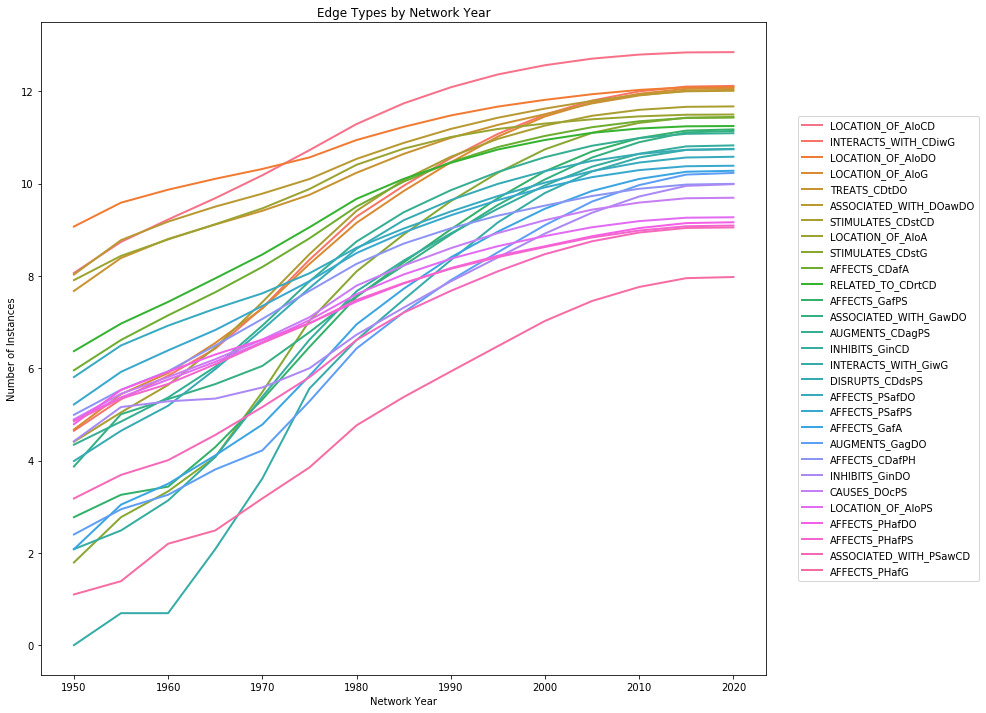

In [18]:
with sns.color_palette('husl', n_colors=len(e_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((13, 12))
    np.log(meta[e_names]).plot(ax=ax, lw=2)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Edge Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5));

In [19]:
meta.T.loc[e_names, 1950].sort_values(ascending=False).head()

LOCATION_OF_AloDO         8693.0
LOCATION_OF_AloCD         3181.0
ASSOCIATED_WITH_DOawDO    3071.0
LOCATION_OF_AloA          2720.0
TREATS_CDtDO              2150.0
Name: 1950, dtype: float64

In [20]:
meta.T.loc[e_names, 1980].sort_values(ascending=False).head()

LOCATION_OF_AloCD         80086.0
LOCATION_OF_AloDO         56644.0
ASSOCIATED_WITH_DOawDO    37631.0
LOCATION_OF_AloA          33135.0
TREATS_CDtDO              27875.0
Name: 1980, dtype: float64

In [21]:
meta.to_csv('../../data/meta_analysis-6_metanode-2_pmid-w_0.6.csv', index=False)